## Data analysis project on Complaints of American Multinational Telecommunications Company ‘Comcast Corporation’ 

In [8]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset from a CSV file
df = pd.read_csv("C:/Users/kaust/Desktop/Project/Comcast_telecom_complaints_data.csv")

In [9]:
# Check unique values in 'Status' column
df['Status'].unique()  
# Output: ['Closed', 'Open', 'Solved', 'Pending']

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [10]:
# Descriptive statistics of numerical columns
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [11]:
# Check DataFrame structure (data types, nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [12]:
# Convert 'Date_month_year' to datetime
df['Date_month_year'] = df['Date_month_year'].apply(pd.to_datetime)

In [13]:
# Convert 'Zip code' to string
df['Zip code'] = df['Zip code'].astype(object)

In [14]:
# Check unique 'Status' values after transformation
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [15]:
# Create 'new_status' column (combine 'Closed' & 'Solved' as 'Closed')
df['new_status'] = ['Closed' if i == 'Closed' or i == 'Solved' else 'Open' for i in df['Status']]

In [16]:
# Preview first 10 rows
df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,new_status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,Closed
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,Open


## 📈 Exploratory Data Analysis (EDA) & Visualization

#### Q1: Top 10 States with Complaints

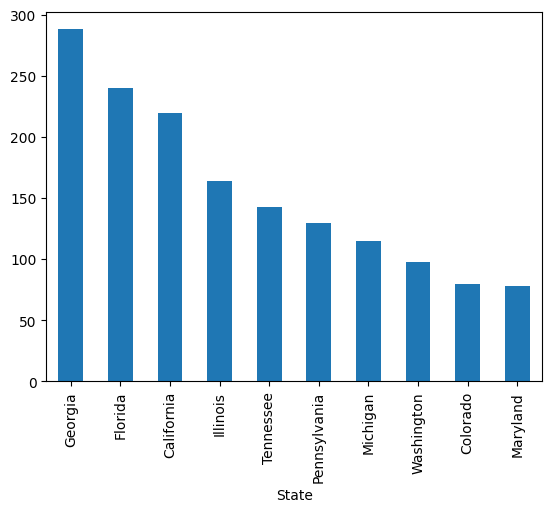

In [25]:
df['State'].value_counts()[:10].plot.bar()
plt.show()

#### Q2: Daily Complaints Count

Text(0, 0.5, 'No of Complaints Received')

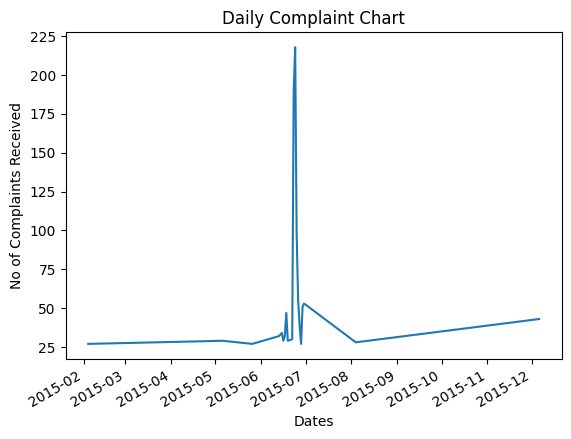

In [23]:
df['Date_month_year'].value_counts()[0: 20].sort_index().plot()
plt.title('Daily Complaint Chart')
plt.xlabel('Dates')
plt.ylabel('No of Complaints Received')

#### Q3: State-wise Complaint Status (Closed/Open)

In [22]:
# Group by state and status (Closed/Open)
df.groupby(['State', 'new_status']).size()

# Convert to tabular format
df.groupby(['State', 'new_status']).size().unstack()

new_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


#### Q4: Top 5 Complaint Receiving States

In [26]:
df.groupby(['State']).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

#### Q6: Monthly Trend Analysis:

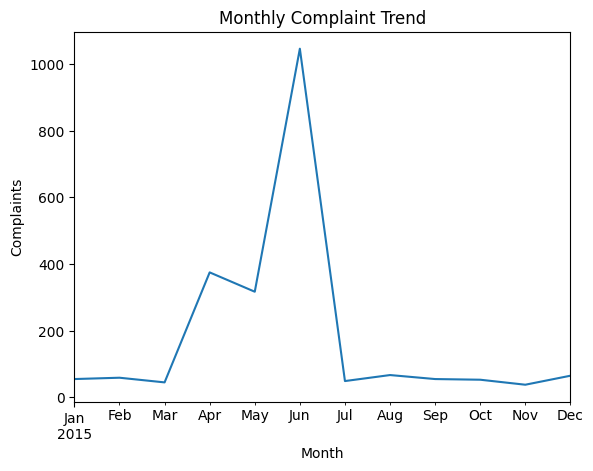

In [30]:
df.set_index('Date_month_year').resample('ME').size().plot()
plt.title('Monthly Complaint Trend')
plt.xlabel('Month')
plt.ylabel('Complaints')
plt.show()

#### Q5: State-wise Complaints Stacked Bar Plot

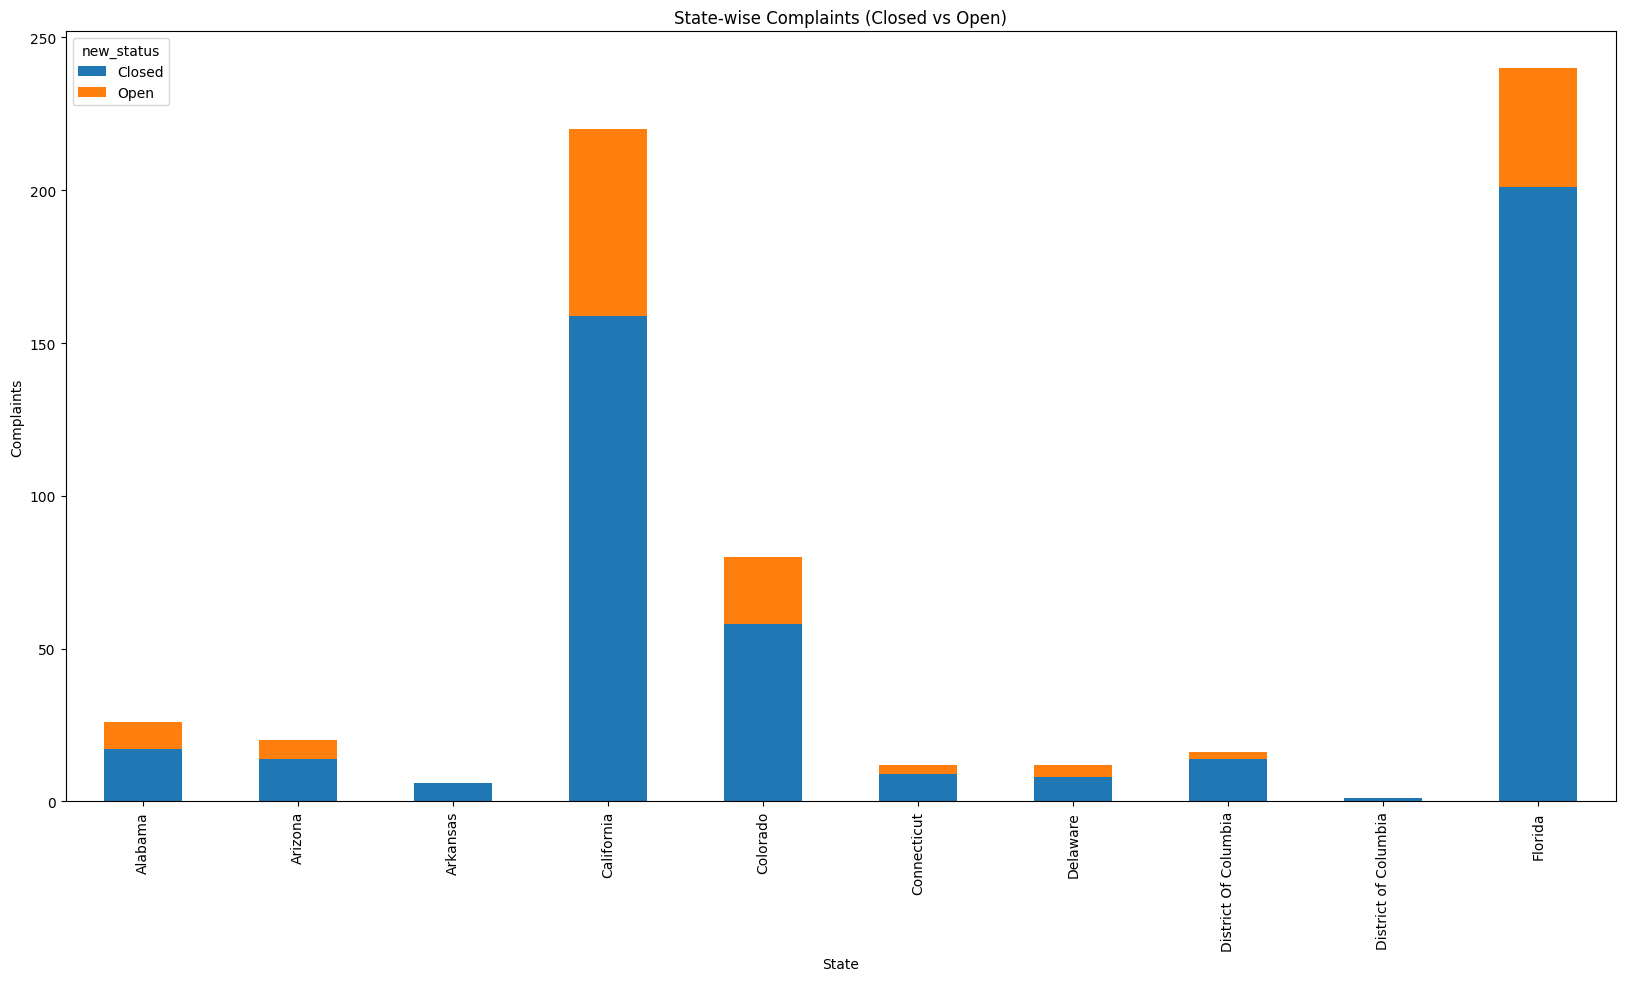

In [31]:
statewise_complaint = df.groupby(['State', 'new_status']).size().unstack().fillna(0)[:10]
statewise_complaint.plot.bar(figsize=(20,10), stacked=True)

# Add title and labels
plt.title('State-wise Complaints (Closed vs Open)')
plt.xlabel('State')
plt.ylabel('Complaints')
plt.show()